In [1]:
import numpy as np
import pandas as pd
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/Users/shubham/Downloads/digit-recognizer/train.csv')

In [3]:
print(df.shape)
df.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Let's dive into data and do some EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


So, each digit has 28x28 i.e., 784 variables that describes it's label

Let's try to see some of the digits, how it exactly looks

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

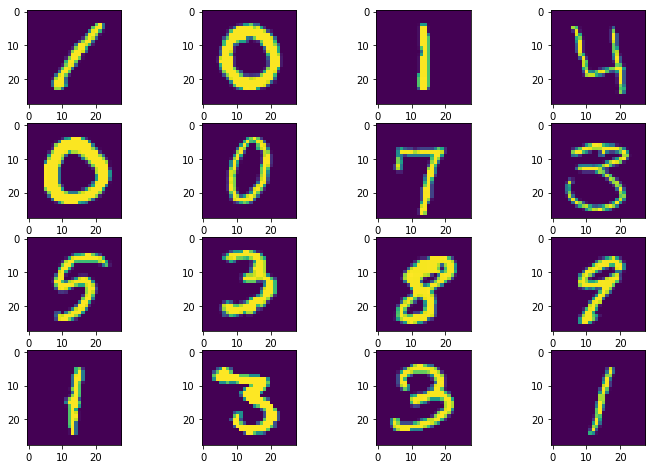

In [6]:
plt.figure(figsize=(12,8))
for i in range(1,17):
      plt.subplot(4,4,i)
      plt.imshow(np.array(df.iloc[i-1:i,1:]).reshape(28,28))

Let's try to reduce number of variables by using one of the dimensionality reduction method **PCA**

Before we instantiate PCA and apply to our dataset, we need to scale it up. So the first thing we do is train and test split

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X = df.iloc[:,1:]
y = df['label']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

Scaling Dataset

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()

In [12]:
X_train_scaled = scaler.fit_transform(X_train)

/Users/shubham/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/shubham/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [13]:
from sklearn.decomposition import PCA

In [14]:
pca = PCA(random_state=100)

In [15]:
pca.fit(X_train_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=100,
  svd_solver='auto', tol=0.0, whiten=False)

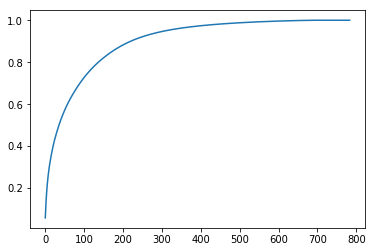

In [16]:
#Plotting scree plot to visualise cummulative sum of variance explained by the components
cumsum = pca.explained_variance_ratio_.cumsum()
plt.plot(cumsum)

#### Visualising distribution of pricipal components

In [17]:
pca1 = PCA(n_components=2, random_state=100)

In [18]:
visual = pca1.fit_transform(X_train_scaled)

In [19]:
dfvisual = pd.DataFrame(visual)

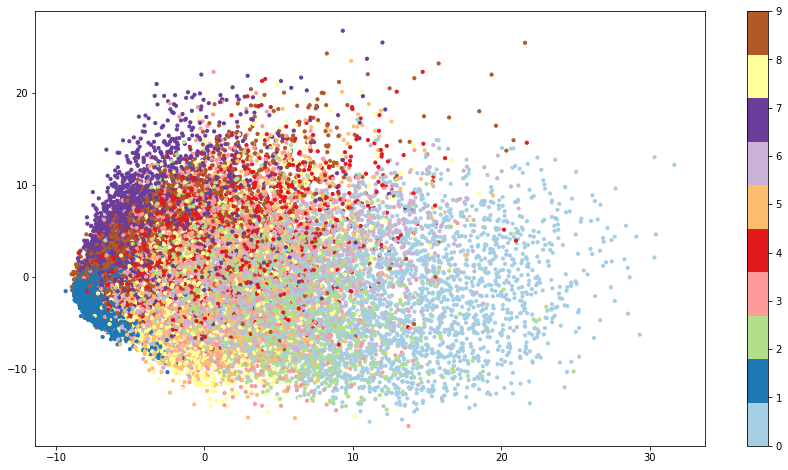

In [20]:
# sns.scatterplot(dfvisual[0],dfvisual[1],hue=y_train, palette='Paired')
plt.figure(figsize=(15,8))
plt.scatter(dfvisual[0],dfvisual[1], c=y_train, s=10, cmap=plt.get_cmap('Paired',10))
plt.colorbar()

In [21]:
# Choosing number of components as 30 and see if it is able to explain most of the variance and how accurately the transformed
# data would predict
nofcomponents = 30
pca2 = PCA(n_components=nofcomponents, random_state=100)

In [22]:
X_train_pca = pca2.fit_transform(X_train_scaled)

In [23]:
#Checking the variance explained by the components
pca2.explained_variance_ratio_.sum()

0.4634632298857603

In [24]:
#Checking the shape again
X_train_pca.shape

(29399, 30)

In [25]:
#Making a dataframe of components
dfpca = pd.DataFrame({'PCA1': pca2.components_[0]})
for i in range(2,nofcomponents+1):
    dfpca['PCA{0}'.format(i)] = pca2.components_[i-1]
dfpca['features'] = df.columns.tolist()[1:]

In [26]:
dfpca.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,...,PCA22,PCA23,PCA24,PCA25,PCA26,PCA27,PCA28,PCA29,PCA30,features
0,7.606069e-17,-8.409173e-17,-6.577717e-17,5.645496e-17,6.252293e-17,4.539990e-18,-1.065232e-16,-2.960188e-17,5.120965e-20,1.326365e-16,...,-5.081201e-17,-5.345663e-17,4.304656e-17,-5.429664e-17,3.010525e-17,2.949911e-17,-1.268773e-17,7.171387e-17,2.637217e-18,pixel0
1,-8.117293e-18,4.889900e-17,-6.623629e-17,-1.832632e-17,-5.125926e-18,-6.412487e-17,3.015955e-17,-2.294768e-16,4.235086e-17,-2.252485e-17,...,4.406291e-17,-7.852296e-18,4.778384e-17,-2.236570e-17,-4.651415e-17,4.486039e-17,3.624134e-17,-1.208325e-17,-6.185716e-17,pixel1
2,3.598935e-19,-7.540918e-18,1.000297e-17,-1.728502e-17,-8.853240e-18,-2.130372e-16,7.113148e-17,1.062133e-16,-6.622806e-17,-3.822826e-17,...,7.865481e-17,1.506092e-17,4.946138e-17,-4.815910e-17,1.853012e-17,3.495112e-17,-9.208920e-20,4.708399e-17,-8.358013e-18,pixel2
3,-2.290004e-19,4.618477e-18,-5.011996e-18,-1.254856e-17,5.692064e-17,-5.648444e-17,5.722889e-17,-3.355991e-17,-2.264742e-17,2.031295e-17,...,-3.102278e-17,-3.713607e-17,-4.540422e-17,9.842213e-17,3.241754e-17,2.682513e-17,1.884975e-17,-1.252907e-18,-4.449745e-17,pixel3
4,-5.245284e-20,-9.693546e-19,-1.039686e-18,1.365058e-17,-2.977878e-18,-1.176793e-16,-1.206415e-17,2.013952e-17,8.756434e-17,9.737508e-17,...,-5.176202e-18,6.978308e-17,-1.199154e-17,-4.735385e-19,4.962825e-17,-3.605582e-17,-4.803679e-18,2.327610e-17,3.864030e-17,pixel4


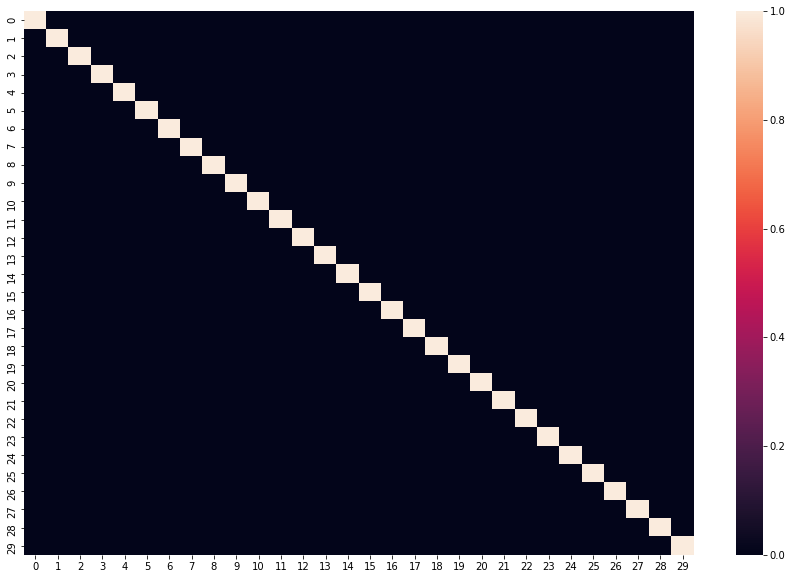

In [27]:
#Checking correlations among columns to make sure it consists of only diagonal matrix
plt.figure(figsize=(15,10))
sns.heatmap(pd.DataFrame(X_train_pca).corr())

We can see the obtained matrix is diagonal matrix

### Now we'll try to fit SVM model and check it's accuracy

In [28]:
from sklearn.svm import SVC

First we'll try to fit linear model using kernal = 'linear'

In [29]:
linearmodel = SVC(kernel='linear')

In [30]:
linearmodel.fit(X_train_pca,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [31]:
#Checking accuracy of the model
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [32]:
X_test_scaled = scaler.transform(X_test)
X_test_pca = pca2.transform(X_test_scaled)
y_pred = linearmodel.predict(X_test_pca)

/Users/shubham/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [33]:
print('Accuracy:',metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.9126984126984127


Let's try to fit non linear model and see if the accuracy improves

In [34]:
#Giving the value of gamma and C randomly for now
model = SVC(kernel='rbf', gamma = 0.01, C=10)

In [35]:
#Fitting the non linear model on our obtained dataset from PCA
model.fit(X_train_pca, y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [36]:
y_pred = model.predict(X_test_pca)

In [37]:
print('Accuracy:' , metrics.accuracy_score(y_pred, y_test))

Accuracy: 0.9613492063492064


### Running GridSearchCV with KFold = 5

In [38]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [39]:
# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 101)

# specifying range of hyperparameters
# Setting the parameters by cross-validation
hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]


# specifying model
model = SVC(kernel="rbf")

# setting up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fitting the model
model_cv.fit(X_train_pca, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed: 21.4min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=101, shuffle=True),
       error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'gamma': [0.01, 0.001, 0.0001], 'C': [1, 10, 100, 1000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=1)

In [40]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,22.605603,3.899717,2.743154,0.283762,1,0.01,"{'C': 1, 'gamma': 0.01}",0.957143,0.953061,0.957483,...,0.954624,0.002326,8,0.990136,0.989966,0.989966,0.990476,0.990349,0.990178,0.000205
1,7.348301,0.180187,2.038034,0.010956,1,0.001,"{'C': 1, 'gamma': 0.001}",0.944218,0.944898,0.940306,...,0.942821,0.001671,9,0.948765,0.949020,0.949445,0.949870,0.949617,0.949344,0.000401
2,14.816122,0.273187,3.643458,0.012446,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.902211,0.901871,0.896939,...,0.900269,0.002268,12,0.901994,0.902504,0.902292,0.903015,0.901701,0.902301,0.000448
3,17.743409,0.564652,2.495468,0.022972,10,0.01,"{'C': 10, 'gamma': 0.01}",0.959014,0.957143,0.962245,...,0.958094,0.002478,5,0.999362,0.999490,0.999362,0.999405,0.999575,0.999439,0.000082
4,4.868177,0.057784,1.283677,0.019895,10,0.001,"{'C': 10, 'gamma': 0.001}",0.959524,0.964796,0.961224,...,0.961223,0.001873,3,0.978571,0.976785,0.976912,0.976912,0.977679,0.977372,0.000678
5,7.255887,0.038623,2.090930,0.010712,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.922279,0.923129,0.918027,...,0.920473,0.002003,11,0.924912,0.922913,0.924274,0.924997,0.924447,0.924309,0.000749
6,17.530849,0.072853,2.728115,0.472460,100,0.01,"{'C': 100, 'gamma': 0.01}",0.959694,0.955952,0.961905,...,0.957924,0.002697,6,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
7,4.571620,0.037293,1.012984,0.013980,100,0.001,"{'C': 100, 'gamma': 0.001}",0.964626,0.966327,0.965646,...,0.965475,0.000608,1,0.994302,0.994302,0.993580,0.994600,0.994133,0.994183,0.000337
8,5.892777,0.682020,1.438929,0.014698,100,0.0001,"{'C': 100, 'gamma': 0.0001}",0.940816,0.942347,0.938776,...,0.939726,0.001743,10,0.950551,0.948892,0.949488,0.950678,0.949957,0.949913,0.000666
9,21.023963,1.602384,2.690866,0.291049,1000,0.01,"{'C': 1000, 'gamma': 0.01}",0.959694,0.955952,0.961905,...,0.957924,0.002697,6,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


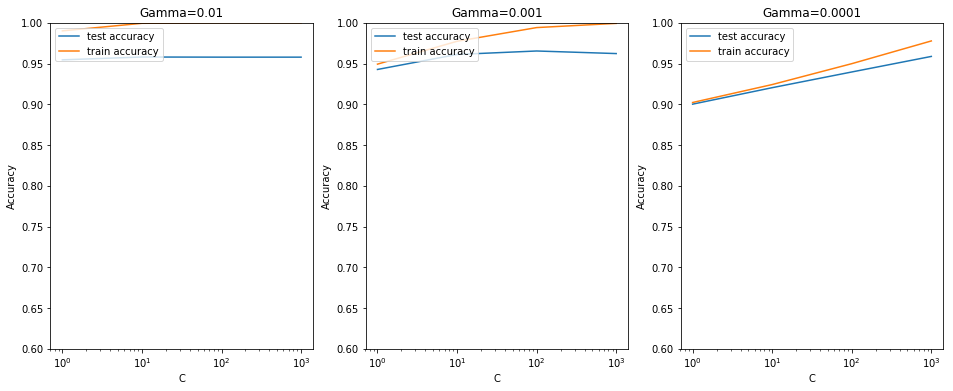

In [41]:
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,6))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')



In [42]:
# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.9654750161570121 corresponding to hyperparameters {'C': 100, 'gamma': 0.001}


### Fitting the final model

In [43]:
model2=SVC(kernel='rbf', C= 100, gamma=0.001)

In [44]:
model2.fit(X_train_pca, y_train)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [45]:
y_pred = model2.predict(X_test_pca)

In [46]:
print('Accuracy:',round(metrics.accuracy_score(y_test,y_pred),2))

Accuracy: 0.97


This accuracy has been achieved with just 30 variables and a very less computation time

### Fitting in the test set

In [47]:
dftest = pd.read_csv('/Users/shubham/Downloads/digit-recognizer/test.csv')

In [48]:
dftest.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
dftest_scaled = scaler.transform(dftest)
dftest_pca = pca2.transform(dftest_scaled)

/Users/shubham/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [63]:
subm = pd.read_csv('/Users/shubham/Downloads/digit-recognizer/sample_submission.csv')

In [64]:
subm['Label'] = model2.predict(dftest_pca)

In [84]:
subm.to_csv('/Users/shubham/Downloads/digit-recognizer/Submission.csv')

In [81]:
subm.set_index(subm['ImageId'],inplace=True)

In [83]:
subm.drop(columns='ImageId', inplace=True)